## Diferencias finitas y problemas de valores inicales
**Temas Selectos de Modelación Numérica** <br>
Facultad de Ciencias, UNAM <br>
Semestre 2022-1

En este notebook veremos ejemplos de cómo implementar los esquemas de diferencias finitas vistos en los videos de clase para discretizaciones espaciales. Además, en las clases pasadas aprendimos a resolver problemas de valores iniciales. En esta práctica nos enfocaremos en resolver problemas de valores de frontera (de segundo orden) usando los métodos de diferenciación vistos en clase (diferencias hacia adelante, hacia atrás y centradas).

Al final del notebook encontrarás ejercicios correpondinetes a la tarea 5. Esta tarea se entrega en una semana. Entrega tu solución a los ejercicios de este notebook junto con los que se hayan dejado en la clase teórica en un notebook en la carpeta de Classroom con el nombre `apellido_nombre_tarea05_diferencias_finitas.ipynb`.

Referencias adicionales al libro de Döös y Lundberg para este notebook: https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

### Aproximación de derivadas usando diferencias finitas

Recordemos las fórmulas para la diferenciación numérica: 

Diferencias hacia adelante:
$$f'(x_j)\approx \frac{f(x_{j+1})-f(x_j)}{h}$$

Diferencias hacia atrás:
$$f'(x_j)\approx \frac{f(x_{j})-f(x_{j-1})}{h}$$

Diferencias centradas:
$$f'(x_j)\approx \frac{f(x_{j+1})-f(x_{j-1})}{2h}$$

Para la segunda derivada pueden demostrar que el esquema de diferencias centradas es:
$$f''(x_j)\approx \frac{f(x_{j+1})-2f(x_{j})+f(x_{j-1})}{h^2}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Para ilustrar el esquema de diferenciación hacia adelante, aproximemos la derivada de la función $y=cos(x)$:

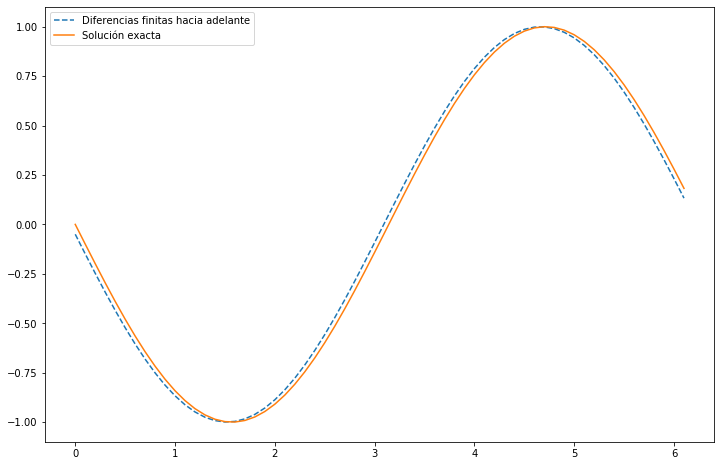

0.049984407218554114


In [2]:
# tamaño del paso o espacio entre puntos de la malla
h = 0.1

# definimos la malla (un vector de puntos que van de 0 a 2pi espaciados en un valor h)
x = np.arange(0, 2*np.pi, h) 

# computamos la función a derivar
y = np.cos(x) 

# vector de diferencias hacia adelante - notemos que 
# el tamaño de este vector es más corto que el original por un punto
dif_adelante = (y[1:]-y[:-1])/h 

# computamos la malla correspondiente que tiene n-1 puntos
x_dif = x[:-1] 

# computamos la solución exacta o derivada analítica
solucion_exacta = -np.sin(x_dif) 

# Graficamos la solución
plt.figure(figsize = (12, 8))
plt.plot(x_dif, dif_adelante, '--', \
         label = 'Diferencias finitas hacia adelante')
plt.plot(x_dif, solucion_exacta, \
         label = 'Solución exacta')
plt.legend()
plt.show()

# Calcula el error máximo entre la apoximación de la derivada 
# y la derivada analítica
max_error = max(abs(solucion_exacta - dif_adelante))
print(max_error)

#### Ejercicio 1: 

1. (5 puntos) Implementa el método de diferencias hacia atrás y diferencias centradas para la misma función ($f(x)=cos(x)$) y grafica las tres aproximaciones y la solución exacta en una misma figura. ¿Qué aproximación tiene el error máximo más pequeño? (1 punto por diferencias hacia atás, 1 punto por diferencias centradas, 2 puntos por la gráfica con tres métodos y solución analítica, 1 punto por encontrar qué método tiene el mayor error máximo).
2. (2 puntos + 1 extra) Cambia el tamaño del paso (h). ¿Qué pasa con el error cuando reduces el paso? ¿y cuando aumentas el paso? (2 puntos por mostrar numéricamente qué pasa cuando aumentas y disminuyes el paso h, 1 punto extra si muestran una gráfica.)

### Problemas de valores a la frontera

El problema de valores a la frontera es una ecuación diferencial ordinaria con algunas restricciones adicionales llamadas *condiciones de frontera*. Como el nombre lo sugiere, los valores que conocemos están especificados en los extremos del dominio, es decir, en las fronteras del intervalo.

En forma general, el problema de valores a la frontera para una ecuación diferencial ordinaria de $k-ésimo$ orden se escribe como:
$$F\bigg(x,f(x),\frac{df(x)}{dx},\frac{d^2f^(x)}{dx^2},...,\frac{d^{k-1}f^(x)}{dx^{k-1}}\bigg)=\frac{d^{k}f^(x)}{dx^{k}}$$

Para resolver esta ecuación en el intervalo $x\in[a,b]$, necesitamos conocer $k$ condiciones de frontera en los puntos $a$ y $b$. Las condiciones de frontera pueden ser valores de la función $f(x)$ o de cualquiera de sus derivadas de orden menor a $k$. En particular, para la ecuación de segundo orden existen varios casos de acuerdo a las condiciones de frontera que conozcamos:
1. Si conocemos dos valores de $f(x)$, en $f(a)$ y $f(b)$,
2. Si conocemos dos derivadas de $f(x)$, $f'(a)$ y $f'(b)$,
3. Si conocemos una derivada y un valor de la función, ya sea $f(a)$ y $f'(b)$ o $f(b)$ y $f'(a)$.

Más adelante en la clase veremos las distintas condiciones de frontera con más detalle. Por ahora usaremos el primer caso.

Por ejemplo, resolvamos el problema de valores iniciales: 

$$\frac{d^2y}{dx^2}=a,$$ donde $a$ es una constante y las condiciones de frontera son $y(0)=0$ y $y(5)=50$. Es decir, nuestro dominio será $x\in[0,5]$. Discretizamos el dominio en n=10 intervalos, 11 puntos, es decir el tamaño del paso será $h=(5-0)/10=0.5$.

Usando la fórmula de diferencias centradas para la derivada de segundo orden podemos aproximar la ecuación original como:

$$y_0=0$$
$$y_{i-1}-2y_i+y_{i+1}=-ah^2, i=1,2,...,n-1$$
$$y_{10}=50.$$

Es decir hay 11 ecuaciones, una para cada $y_i$. Podemos expresarlas en forma matricial como

$$\begin{bmatrix}
1 & 0 &  &  &\\
1 & -2 & 1  &  &\\
& \ddots & \ddots & \ddots  & \\
  &      &1    & -2 &1\\
  &    &  & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots\\
y_{n-1}\\
y_n\\
\end{bmatrix}=
\begin{bmatrix}
0 \\
-ah^2 \\
\vdots\\
-ah^2\\
50\\
\end{bmatrix}$$

o 

$$AY=b$$

para abreviar la expresión.

Para resolver este sistema de ecuaciones usaremos la función `solve` del módulo de álgebra lineal `linalg` de numpy:

In [3]:
# definimos el número de intervalos de la malla y el paso
n = 10
h = (5-0) / n

## Construyamos la matrix de coeficientes
# Primero hacemos una matriz de tamaño n+1 x n+1 llena de ceros (función np.zeros)
A = np.zeros((n+1, n+1))

# Asignamos el valor 1 a los extremos superior izquierdo e inferior derecho de la matriz
A[0, 0] = 1
A[n, n] = 1

# Asignamos los coeficientes 
# correspondientes al esquema de diferencias finitas que 
# obtuvimos al resto de la matriz (a las filas y columnas entre 1 y n-1)
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

# revisemos cómo se ve la matriz:
print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


[ 0.   -2.25 -2.25 -2.25 -2.25 -2.25 -2.25 -2.25 -2.25 -2.25 50.  ]


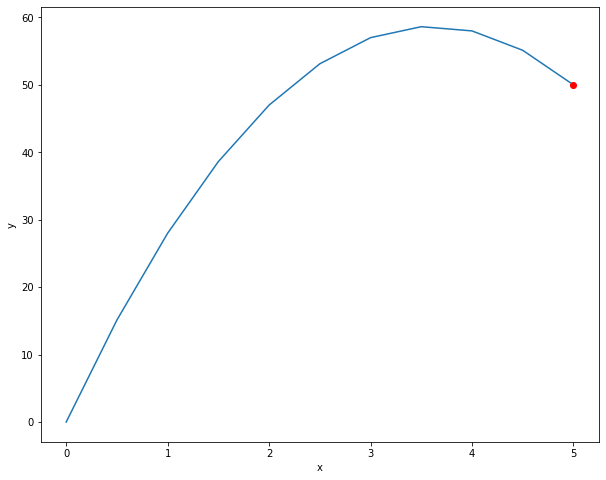

In [4]:
# Construimos la matriz b y asignamos el valor 9 a la constante 
b = np.zeros(n+1)
b[1:-1] = -9*h**2
b[-1] = 50
print(b)

# Ahora sí, resolvemos el sistema AY=b usando la función solve 
# del módulo linalg de numpy
y = np.linalg.solve(A, b)
x = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.plot(5, 50, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notemos que este método particular funciona para ecuaciones lineales. Si nuestra ecuación fuera no lineal no tendríamos un sistema de ecuaciones lineales y tendríamos que recurrir a otros métodos para resolver el problema. 

#### Ejercicio 2.
1. Usando el método de diferencias finitas y matrices encuentra la solución al siguiente problema lineal de valores iniciales 
$$\frac{d^2y}{dx^2}=-4y+4x,$$
con condiciones de frontera $y(0)=0$ y $dy/dx=3$ en $y(\pi/2)$. La solución exacta es $y=x-sin(2x)$. 
2. Grafica el error en el valor de la frontera $y(\pi/2)$ como función del número de puntos en tu malla (intenta con una malla de n=3, n=10, n=50, n=100).

### Ejercicios para la tarea 5

1. Resuleve el Ejercicio 1 (sección de diferenciación)
2. Resuelve el Ejercicio 2 (sección valores a la frontera)
3. Agrega al notebook de tarea los ejercicios que se hayan dejado durante la clase teórica.